In [1]:
import numpy as np
from astropy.io import fits as pf

from astropy.modeling import models, fitting
from matplotlib import pyplot as plt 
from specim_test.specim.specfuncs import spec2d, spec1d

In [2]:
infile1 = '../galaxy_spectra/spec2d_r201121_0030-J0040+2555_LRISr_2020Nov21T045325.037.fits'
infile2 = '../galaxy_spectra/spec2d_r201121_0031-J0040+2555_LRISr_2020Nov21T051705.971.fits'

In [3]:
spec1 = spec2d.Spec2d(infile1, hext=12, xtrim=[40, 170]) #  xtrim=[40, 500]


Loading file ../galaxy_spectra/spec2d_r201121_0030-J0040+2555_LRISr_2020Nov21T045325.037.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/spec2d_r201121_0030-J0040+2555_LRISr_2020Nov21T045325.037.fits (HDU=12)
The input dataset was trimmed
 xrange: 40:171.  yrange: 0:4096
Final data dimensions (x y): 131 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 131



In [4]:
spec1.set_dispaxis('y')


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096





pypeit generated sky model will be used for sky subtraction


Cutout image center (x, y): (2048, 65)
Cutout image size (x y): 4096x131

Calculating display limits
--------------------------
 Clipped mean: 80.152565
 Clipped rms:  13.460249
 fmin (mean -   1 sigma):  66.692316
 fmax (mean +  10 sigma):  214.755054
 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00


Cutout image center (x, y): (2048, 65)
Cutout image size (x y): 4096x131

Calculating display limits
--------------------------
 Clipped mean: 104.643723
 Clipped rms:  46.558998
 fmin (mean -   1 sigma):  58.084724
 fmax (mean +  10 sigma):  570.233704

Cutout image center (x, y): (2048, 65)
Cutout image size (x y): 4096x131

Calculating display limits
--------------------------
 Clipped mean: 3.303260
 Clipped rms:  15.851709
 fmin (mean -   1 sigma):  -12.548450
 fmax (mean +  10 sigma):  161.820353


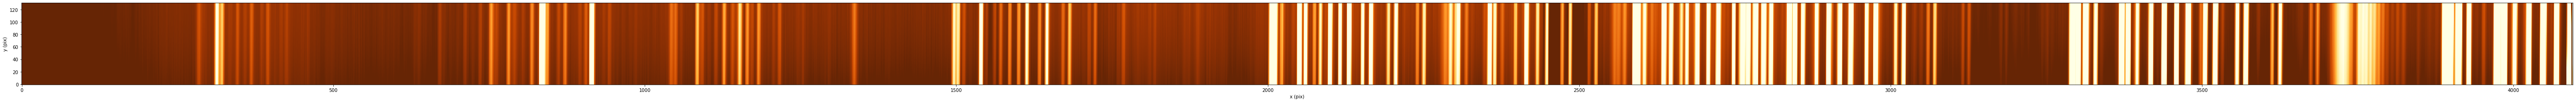

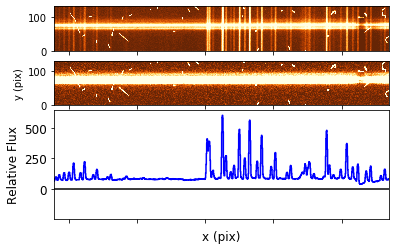

<Figure size 432x288 with 0 Axes>

In [5]:
spec1.display_spec(use_skymod=True)

Profile max value (before normalization) 915.044556


<IPython.core.display.Javascript object>


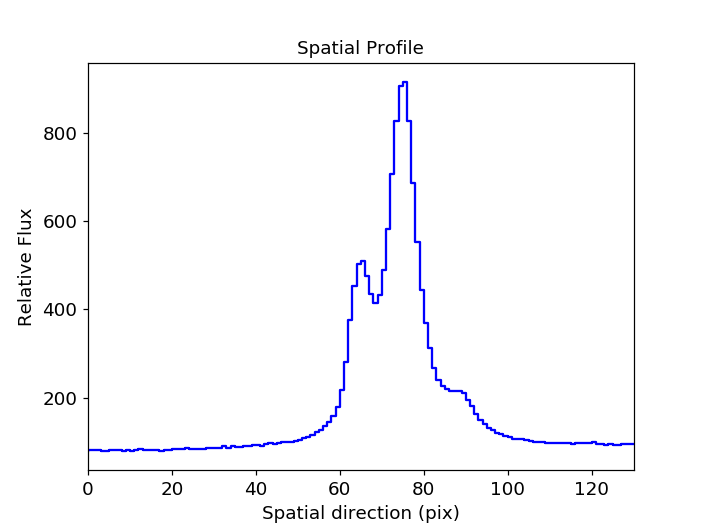

In [6]:
%matplotlib notebook
profile = spec1.spatial_profile(pixrange=[1900,2200])

In [ ]:
## These are the values we used as initial guess for profiles

# if two Gaussian and one Moffat
# co = 90
# gauss 1 (secondary peak) = 500, 65, 3
# gauss 2 (tertiary peak) = 200, 90, 3
# primary peak = 800, 75, 3, 4.765 (for Moffat profile) or 800, 75, 3 (if gaussian profile is used)


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 3
Number of Moffat profile : 0

Now enter constants of the background polynomial upto degree 0
c0 : 90

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 500, 65, 3

amplitude=500.000000, mu=65.000000, sigma=3.000000

Parameters of Gaussian profile 2 : 800, 75, 3

amplitude=800.000000, mu=75.000000, sigma=3.000000

Parameters of Gaussian profile 3 : 200, 90, 3

amplitude=200.000000, mu=90.000000, sigma=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=87.91933028)>

    [1]: <Gaussian1D(amplitude=306.84145584, mean=65.53118194, stddev=2.57266362)>

    [2]: <G

<IPython.core.display.Javascript object>


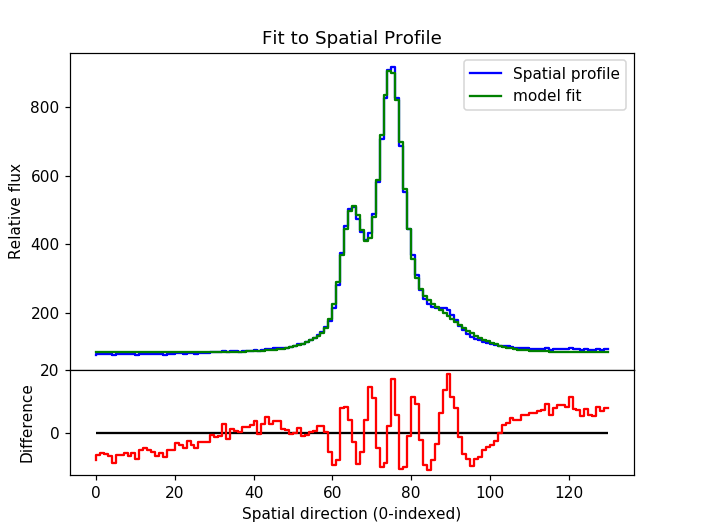

<IPython.core.display.Javascript object>


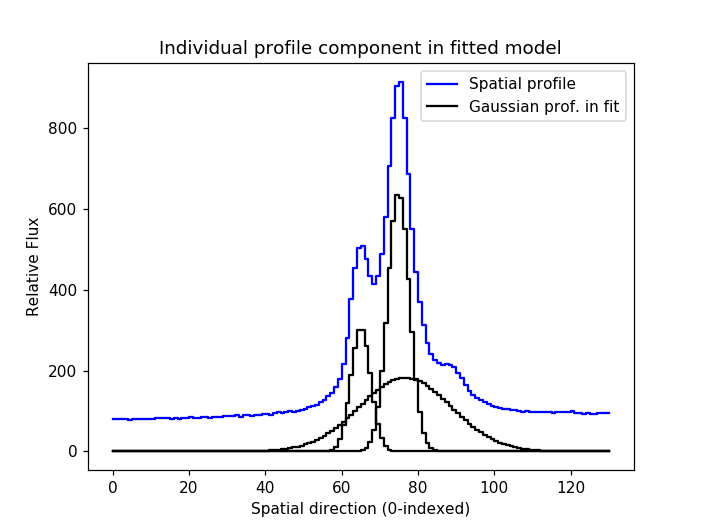


Do you want to start over ? : type yes/no
no


In [7]:
mod1 = spec1.initial_model()

In [ ]:
mod2 = spec1.initial_model()

In [8]:
# impose constraints
def tie_gamma(model):
     
    return model.gamma_4
    
def tie_alpha(model):
     
    return model.alpha_4                   
                    
def tie_pos1(model):
    #print('tie_pos1')
    #if isinstance(model, models.Gaussian1D):
        #print(model.mean_2 - 1.232)
    return model.mean_2 - 10.232
    
    #elif isinstance(model[3], models.Moffat1D):
        #print( model.x_0_3 - 1.232)
    #return model.x_0_3 - 10.232
            
def tie_pos2(model):
    #if isinstance(model[2], models.Gaussian1D):
    return model.mean_2 + 14.887
    
    #elif isinstance(model[3], models.Moffat1D):
    #return model.x_0_3 + 14.887
            
        
mod1[1].mean.tied = tie_pos1 
mod1[3].mean.tied = tie_pos2 

#mod2[1].mean.tied = tie_pos1 
#mod2[2].mean.tied = tie_pos2 

#mod[3].x_0.tied = tie_pos
#mod[2].alpha.tied = tie_alpha
#mod[3].alpha.tied = tie_alpha


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=87.91933028)>

    [1]: <Gaussian1D(amplitude=306.84145584, mean=65.53118194, stddev=2.57266362)>

    [2]: <Gaussian1D(amplitude=642.1716056, mean=75.40452129, stddev=2.87927509)>

    [3]: <Gaussian1D(amplitude=182.22563639, mean=77.18008329, stddev=12.06096849)>
Parameters:
           c0_0          amplitude_1     ...      mean_3           stddev_3     
    ----------------- ------------------ ... ---------------- ------------------
    87.91933028498595 306.84145584103436 ... 77.1800832866146 12.060968485169871

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=92.42931666)>

    [1]: <Gaussian1D(amplitude=397.40915476, mean=65.24314463, stddev

<IPython.core.display.Javascript object>


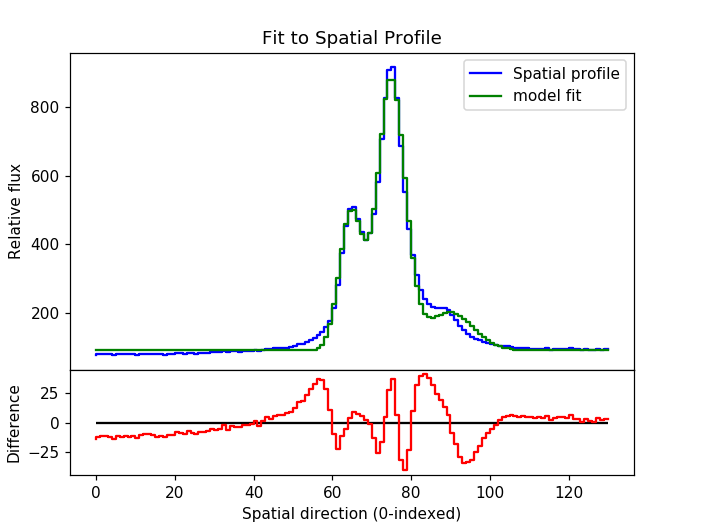

<IPython.core.display.Javascript object>


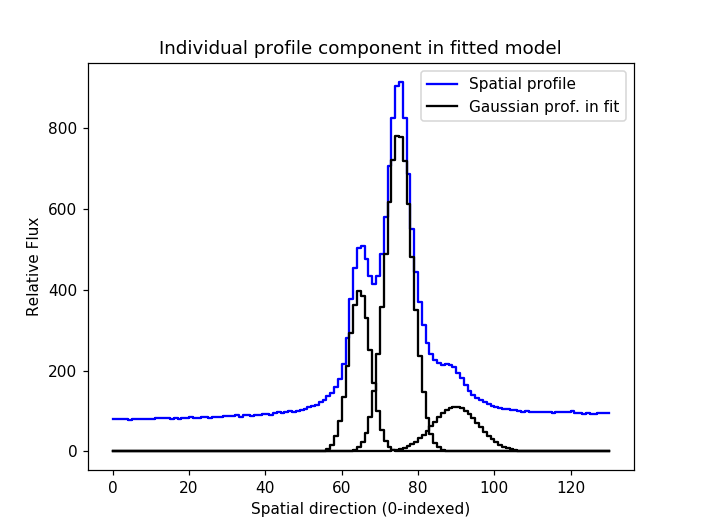

In [9]:
 mod_new1 = spec1.refined_model(mod1)

In [ ]:
 mod_new2 = spec1.refined_model(mod2)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 136 segments
  of the 2D spectrum with stepsize=30 pix ...
    Done
Fitting polynomial of degree 3 to parameter: mean_1
Fitting polynomial of degree 2 to parameter: stddev_1
Fitting polynomial of degree 3 to parameter: mean_2
Fitting polynomial of degree 2 to parameter: stddev_2
Fitting polynomial of degree 3 to parameter: mean_3
Fitting polynomial of degree 3 to parameter: stddev_3


<IPython.core.display.Javascript object>


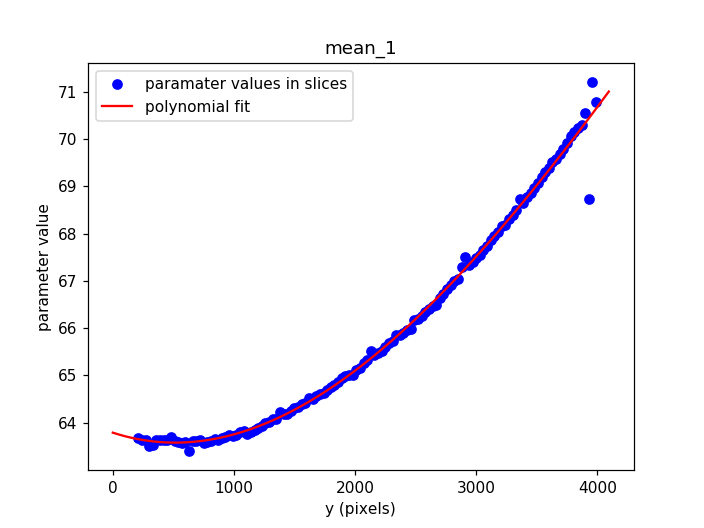

<IPython.core.display.Javascript object>


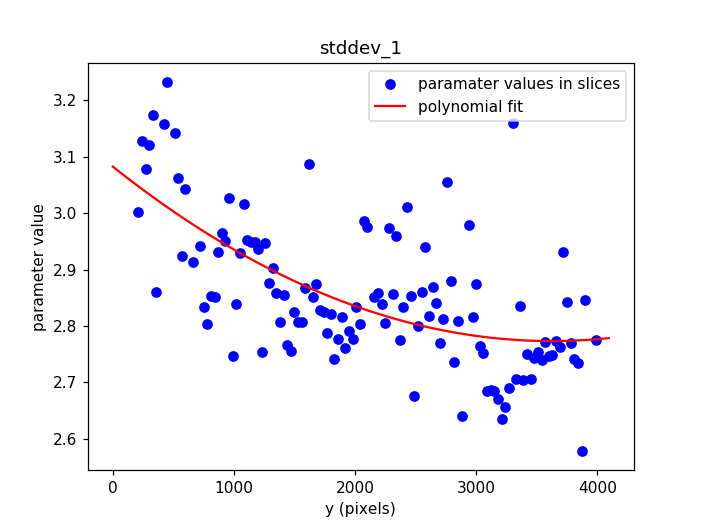

<IPython.core.display.Javascript object>


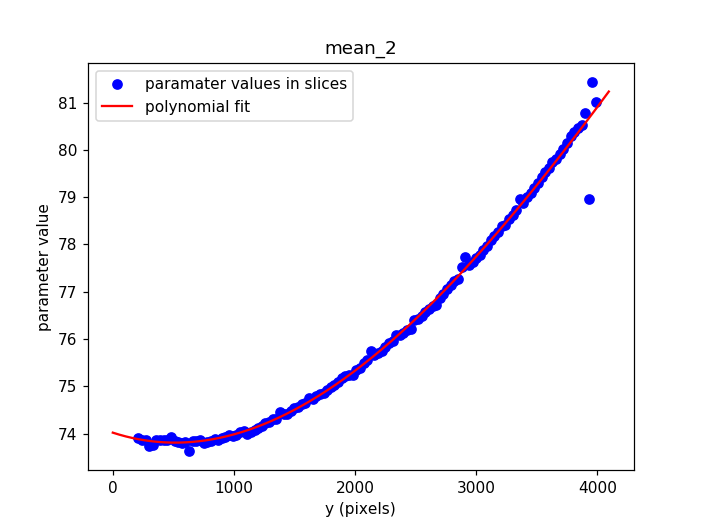

<IPython.core.display.Javascript object>


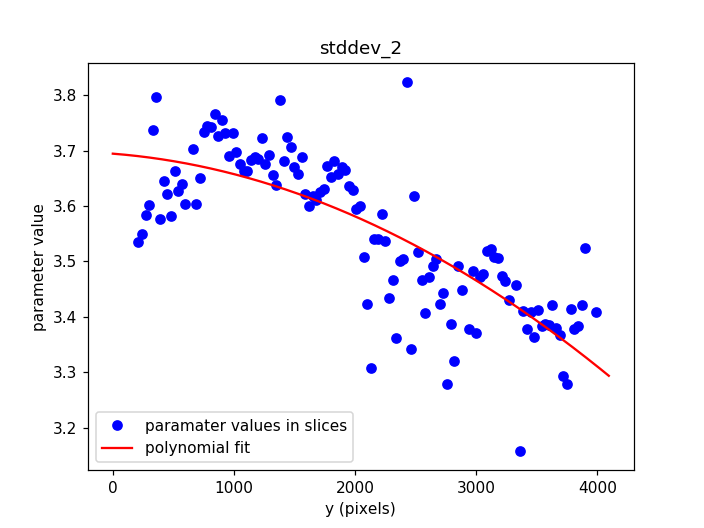

<IPython.core.display.Javascript object>


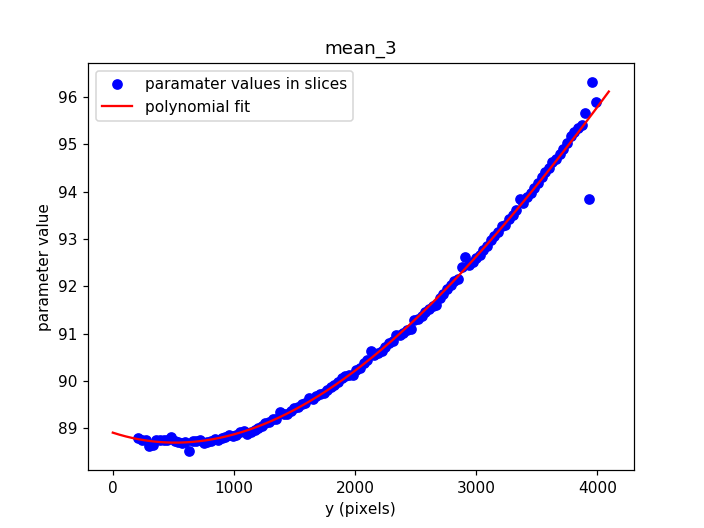

<IPython.core.display.Javascript object>


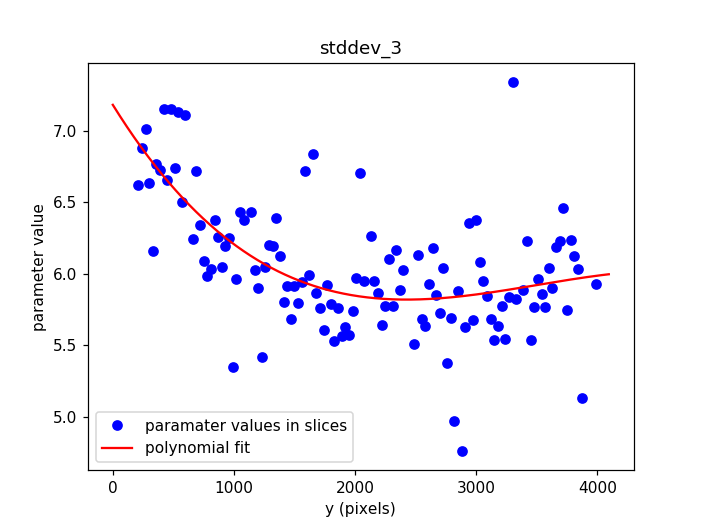

In [10]:
spec1.find_and_trace(mod_new1, stepsize=30, fitorder={'stddev_1':2, 'stddev_2':2}, 
                    fitrange=[200,4000])  

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5648.49
 Spectrum End:     8924.68
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5648.48
 Spectrum End:     8924.63
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5648.46
 Spectrum End:     8924.55
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80


Plotting the spectrum


<IPython.core.display.Javascript object>


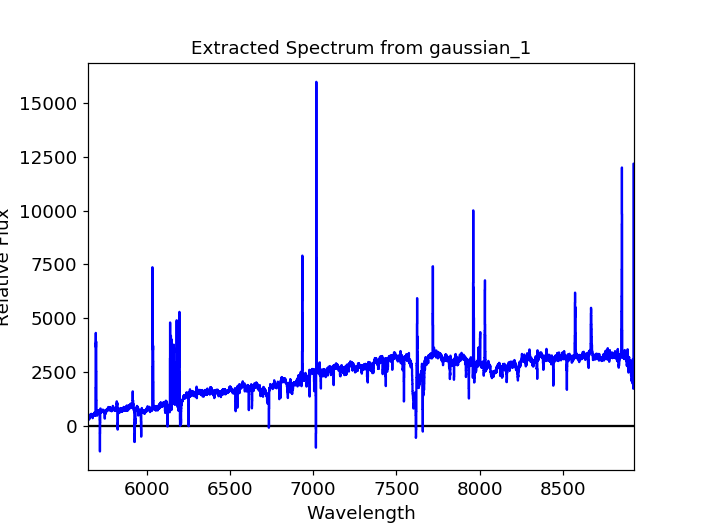

<IPython.core.display.Javascript object>


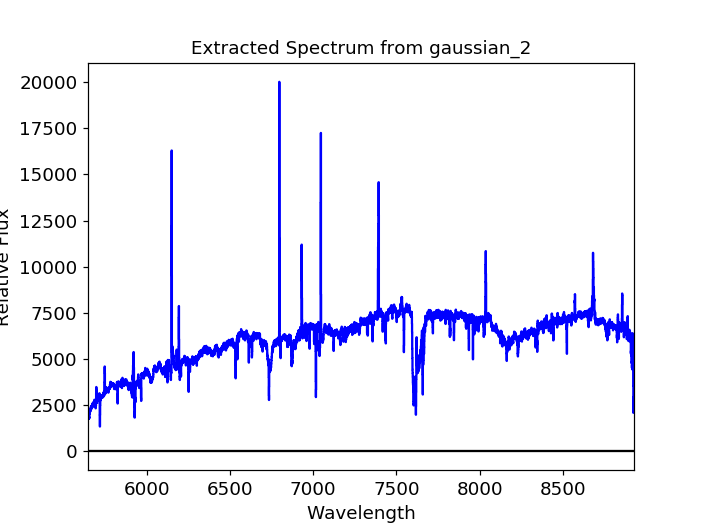

<IPython.core.display.Javascript object>


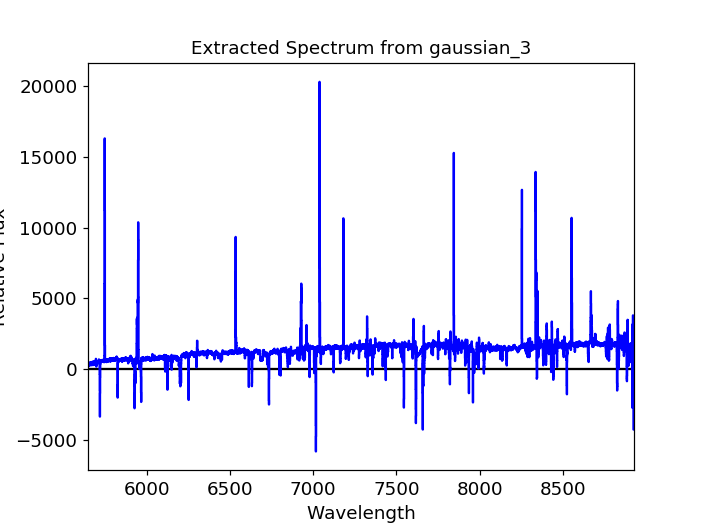

In [11]:
spec1.extract(method='modelfit', use_wavim=True)

In [ ]:
spec_gauss1 = spec1d.Spec1d(wav=gaus1_wav, flux=spec1.spectra[0][1]['flux'])
spec_gauss2 = spec1d.Spec1d(wav=gaus2_wav, flux=spec1.spectra[1][1]['flux'])

In [ ]:
spec_gauss1.smooth(15)

In [ ]:
spec_gauss2.smooth(15)

In [ ]:
mean_1 = np.round(spec1.parm_tab['mean_1'])
mean_2 = np.round(spec1.parm_tab['mean_2'])
x0_3 = np.round(spec1.parm_tab['x_0_3'])

In [ ]:
wavim = pf.open(infile1)[19].data

In [ ]:
gaus1_wav = np.zeros(len(mean_1))
gaus2_wav = np.zeros(len(mean_2))
moff1_wav = np.zeros(len(mean_1))

for i in range(len(mean_1)):
    gaus1_wav[i] = wavim[i][int(mean_1[i])]
    
for i in range(len(mean_1)):
    gaus2_wav[i] = wavim[i][int(mean_2[i])]
    
for i in range(len(mean_1)):
    moff1_wav[i] = wavim[i][int(x0_3[i])]